**1. IMPORT PACKAGE**

In [6]:
pip install tweepy

  Using cached tweepy-4.10.0-py3-none-any.whl (94 kB)
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)
  Using cached oauthlib-3.2.0-py3-none-any.whl (151 kB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import tweepy
import matplotlib.pyplot as plt
import networkx as nx
from networkx.readwrite import json_graph
from plotly.offline import download_plotlyjs, init_notebook_mode,  iplot, plot
init_notebook_mode(connected=True)

# Machine Learning imports
import nltk
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV
import joblib
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer

import string
import re
from string import punctuation
from collections import Counter

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

**2. IMPORT DATA**

In [2]:
df= pd.read_excel('C:/Users/user/Downloads/Compressed/User-Generated-Content-to-Predict-Hoax-News-or-Not-Using-Text-data-with-Naive-Bayes-Algorithm-main/User-Generated-Content-to-Predict-Hoax-News-or-Not-Using-Text-data-with-Naive-Bayes-Algorithm-main/datasetfix.xlsx')
df

,ID,label,judul,narasi
0,1,0,Arab Saudi Tidak Mewajibkan Masker untuk Jamaa...,Alhamdullilah 🙏\nMulai 6 Maret Saudi Arabia re...
1,2,0,Foto Tangkapan Layar Akun Twitter @BPJSKeseha...,ukraina jika ingin mendapatkan bantuan dari In...
2,3,0,Imigran Ilegal di Amerika Serikat Mendapatkan ...,"Pada 2022, imigran ilegal akan mendapatkan KEB..."
3,4,0,BPJS Kesehatan Berikan Dana Bantuan Rp100 Juta,Penerima Dana Bantuan BPJS di Wajibkan Melakuk...
4,5,0,5G Dapat Mengganggu Keamanan Penerbangan yang ...,Hmm… Hanya akan menuliskan ini di sini. Jika k...
...,...,...,...,...
95,96,1,Tips Cegah Penyakit Jantung untuk Orang dengan...,"Walau belum sampai ke tahap diabetes, mereka y..."
96,97,1,10 Cara Meredakan Hidung Tersumbat,Hidung tersumbat yang bisa sangat mengganggu p...
97,98,1,Posisi Tidur Saat Hidung Tersumbat,Penyebab susah tidur salah satunya bisa datang...
98,99,1,10 Cara Mengatasi Hidung Tersumbat yang Bisa D...,Hidung tersumbat adalah masalah kesehatan yang...


**3. Preprocessing Data**

In [3]:
df

,ID,label,judul,narasi
0,1,0,Arab Saudi Tidak Mewajibkan Masker untuk Jamaa...,Alhamdullilah 🙏\nMulai 6 Maret Saudi Arabia re...
1,2,0,Foto Tangkapan Layar Akun Twitter @BPJSKeseha...,ukraina jika ingin mendapatkan bantuan dari In...
2,3,0,Imigran Ilegal di Amerika Serikat Mendapatkan ...,"Pada 2022, imigran ilegal akan mendapatkan KEB..."
3,4,0,BPJS Kesehatan Berikan Dana Bantuan Rp100 Juta,Penerima Dana Bantuan BPJS di Wajibkan Melakuk...
4,5,0,5G Dapat Mengganggu Keamanan Penerbangan yang ...,Hmm… Hanya akan menuliskan ini di sini. Jika k...
...,...,...,...,...
95,96,1,Tips Cegah Penyakit Jantung untuk Orang dengan...,"Walau belum sampai ke tahap diabetes, mereka y..."
96,97,1,10 Cara Meredakan Hidung Tersumbat,Hidung tersumbat yang bisa sangat mengganggu p...
97,98,1,Posisi Tidur Saat Hidung Tersumbat,Penyebab susah tidur salah satunya bisa datang...
98,99,1,10 Cara Mengatasi Hidung Tersumbat yang Bisa D...,Hidung tersumbat adalah masalah kesehatan yang...


In [37]:
# #menghilangkan kolom
# columns = ['published_time','body','image','href']
# df.drop(columns, inplace=True, axis=1)

In [4]:
df['teks']=df['judul'].astype(str)+' '+df['narasi'].astype(str)
col=['judul', 'narasi']
df.drop(col, inplace=True, axis=1)

In [5]:
df

,ID,label,teks
0,1,0,Arab Saudi Tidak Mewajibkan Masker untuk Jamaa...
1,2,0,Foto Tangkapan Layar Akun Twitter @BPJSKeseha...
2,3,0,Imigran Ilegal di Amerika Serikat Mendapatkan ...
3,4,0,BPJS Kesehatan Berikan Dana Bantuan Rp100 Juta...
4,5,0,5G Dapat Mengganggu Keamanan Penerbangan yang ...
...,...,...,...
95,96,1,Tips Cegah Penyakit Jantung untuk Orang dengan...
96,97,1,10 Cara Meredakan Hidung Tersumbat Hidung ters...
97,98,1,Posisi Tidur Saat Hidung Tersumbat Penyebab su...
98,99,1,10 Cara Mengatasi Hidung Tersumbat yang Bisa D...


In [6]:
# helper function to clean text
def processTeks(teks):
    # Remove HTML special entities (e.g. &amp;)
    teks = re.sub(r'\&\w*;', '', teks)
    #Convert @username to AT_USER
    teks = re.sub('@[^\s]+','',teks)
    # Remove tickers
    teks = re.sub(r'\$\w*', '', teks)
    # To lowercase
    teks = teks.lower()
    # Remove hyperlinks
    teks = re.sub(r'https?:\/\/.*\/\w*', '', teks)
    # Remove hashtags
    teks = re.sub(r'#\w*', '', teks)
    # Remove Punctuation and split 's, 't, 've with a space for filter
    teks = re.sub(r'[' + punctuation.replace('@', '') + ']+', ' ', teks)
    # Remove words with 2 or fewer letters
    teks = re.sub(r'\b\w{1,2}\b', '', teks)
    # Remove whitespace (including new line characters)
    teks = re.sub(r'\s\s+', ' ', teks)
    # Remove single space remaining at the front of the tweet.
    teks = teks.lstrip(' ') 
    # Remove characters beyond Basic Multilingual Plane (BMP) of Unicode:
    teks = ''.join(c for c in teks if c <= '\uFFFF') 
    return teks

In [7]:
# clean dataframe's text column
df['teks'] = df['teks'].apply(processTeks)
# preview some cleaned tweets
df['teks'].head()

0    arab saudi tidak mewajibkan masker untuk jamaa...
1    foto tangkapan layar akun twitter yang mengata...
2    imigran ilegal amerika serikat mendapatkan keb...
3    bpjs kesehatan berikan dana bantuan rp100 juta...
4    dapat mengganggu keamanan penerbangan yang ber...
Name: teks, dtype: object

In [8]:
# drop duplicates
df = df.drop_duplicates('teks')
df.shape

(100, 3)

In [9]:
#stopwords
lstfile = open('C:/Users/user/Downloads/Compressed/User-Generated-Content-to-Predict-Hoax-News-or-Not-Using-Text-data-with-Naive-Bayes-Algorithm-main/User-Generated-Content-to-Predict-Hoax-News-or-Not-Using-Text-data-with-Naive-Bayes-Algorithm-main/stopword id en.txt','r',encoding="utf8")
lst = lstfile.readlines()
lst = [x.strip() for x in lst] 
# tokenize helper function
def text_process(raw_text):
    # Check characters to see if they are in punctuation
    nopunc = [char for char in list(raw_text) if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.lower().split() if word.lower() not in lst]

# -------------------------------------------

# tokenize message column and create a column for tokens
df = df.copy()
df['tokens'] = df['teks'].apply(text_process) # tokenize style 1
df[['teks','tokens']].head(100)

,teks,tokens
0,arab saudi tidak mewajibkan masker untuk jamaa...,"[arab, saudi, mewajibkan, masker, jamaah, masj..."
1,foto tangkapan layar akun twitter yang mengata...,"[foto, tangkapan, layar, akun, twitter, ukrain..."
2,imigran ilegal amerika serikat mendapatkan keb...,"[imigran, ilegal, amerika, serikat, kebebasan,..."
3,bpjs kesehatan berikan dana bantuan rp100 juta...,"[bpjs, kesehatan, dana, bantuan, rp100, juta, ..."
4,dapat mengganggu keamanan penerbangan yang ber...,"[mengganggu, keamanan, penerbangan, berbahaya,..."
...,...,...
95,tips cegah penyakit jantung untuk orang dengan...,"[tips, cegah, penyakit, jantung, orang, predia..."
96,cara meredakan hidung tersumbat hidung tersumb...,"[meredakan, hidung, tersumbat, hidung, tersumb..."
97,posisi tidur saat hidung tersumbat penyebab su...,"[posisi, tidur, hidung, tersumbat, penyebab, s..."
98,cara mengatasi hidung tersumbat yang bisa dija...,"[mengatasi, hidung, tersumbat, dijajal, rumah,..."


In [10]:
#word cload
all_words = []
for line in df['tokens']: 
    all_words.extend(line)  
# create a word frequency dictionary
wordfreq = Counter(all_words)
wordfreq.most_common(10)

[('kesehatan', 343),
 ('vitamin', 95),
 ('penyakit', 70),
 ('tidur', 70),
 ('tubuh', 69),
 ('covid', 63),
 ('disabilitas', 61),
 ('darah', 58),
 ('orang', 58),
 ('anak', 58)]

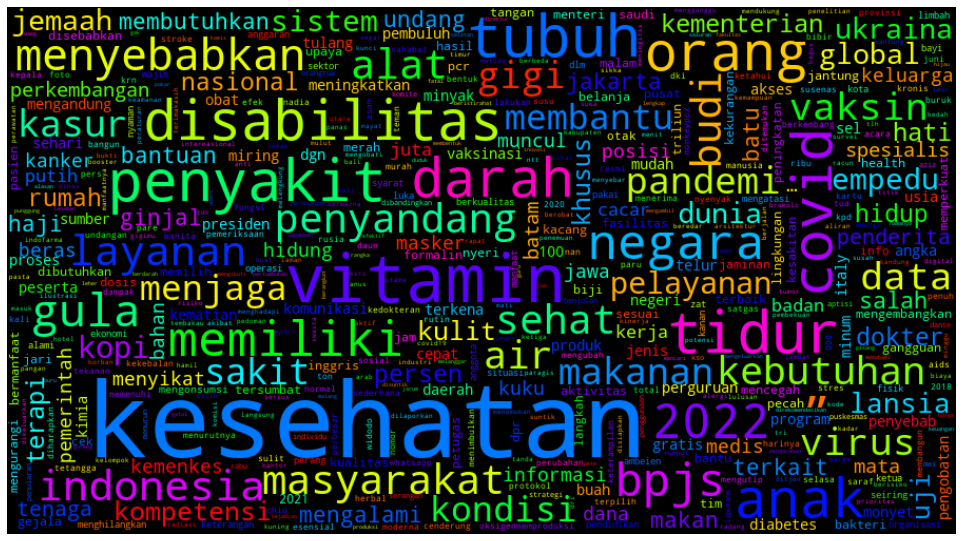

In [11]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=500,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='gist_rainbow',
                      normalize_plurals=True).generate_from_frequencies(wordfreq)
plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [12]:
# vectorize
bow_transformer = CountVectorizer(analyzer=text_process).fit(df['teks'])
# print total number of vocab words
print(len(bow_transformer.vocabulary_))
# example of vectorized text
sample_teks = df['teks'][0]
print(sample_teks)
print('\n')
# vector representation
bow_sample = bow_transformer.transform([sample_teks])
print(bow_sample)
print('\n')

3648
arab saudi tidak mewajibkan masker untuk jamaah masjidil haram dan masjid nabawi serta akan menyediakan asuransi kesehatan alhamdullilah 
mulai maret saudi arabia resmi hapuskan karantina social distancing tidak wajib masker tidak wajib pcr antigen ketika datang saudi arabia adanya asuransi mencover covid selama berada disana rabb izinkan kami berkunjung kerumahmu aamiin 


  (0, 68)	1
  (0, 124)	1
  (0, 173)	1
  (0, 195)	1
  (0, 196)	2
  (0, 226)	2
  (0, 401)	1
  (0, 609)	1
  (0, 825)	1
  (0, 841)	1
  (0, 1090)	1
  (0, 1091)	1
  (0, 1242)	1
  (0, 1260)	1
  (0, 1349)	1
  (0, 1486)	1
  (0, 1495)	1
  (0, 1794)	1
  (0, 1801)	1
  (0, 1802)	1
  (0, 1803)	2
  (0, 1971)	1
  (0, 2162)	1
  (0, 2208)	1
  (0, 2281)	1
  (0, 2437)	1
  (0, 2811)	1
  (0, 2875)	1
  (0, 2967)	3
  (0, 3143)	1
  (0, 3545)	2




In [13]:
# transform the entire DataFrame of messages
messages_bow = bow_transformer.transform(df['teks'])

# check out the bag-of-words counts for the entire corpus as a large sparse matrix
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (100, 3648)
Amount of Non-Zero occurences:  6685


In [14]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf_sample = tfidf_transformer.transform(bow_sample)
print(tfidf_sample)

  (0, 3545)	0.2394587086331366
  (0, 3143)	0.15413262890362142
  (0, 2967)	0.42430621162148674
  (0, 2875)	0.1070321292867758
  (0, 2811)	0.15413262890362142
  (0, 2437)	0.13242657934636082
  (0, 2281)	0.15413262890362142
  (0, 2208)	0.15413262890362142
  (0, 2162)	0.13242657934636082
  (0, 1971)	0.15413262890362142
  (0, 1803)	0.2394587086331366
  (0, 1802)	0.15413262890362142
  (0, 1801)	0.15413262890362142
  (0, 1794)	0.12543879216486123
  (0, 1495)	0.0471057999006462
  (0, 1486)	0.15413262890362142
  (0, 1349)	0.15413262890362142
  (0, 1260)	0.15413262890362142
  (0, 1242)	0.15413262890362142
  (0, 1091)	0.15413262890362142
  (0, 1090)	0.15413262890362142
  (0, 841)	0.15413262890362142
  (0, 825)	0.1414354038738289
  (0, 609)	0.07503890586884045
  (0, 401)	0.1414354038738289
  (0, 226)	0.30826525780724284
  (0, 196)	0.2828708077476578
  (0, 195)	0.1414354038738289
  (0, 173)	0.1414354038738289
  (0, 124)	0.15413262890362142
  (0, 68)	0.15413262890362142


In [15]:
# some IDF (inverse document frequency) example
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['kesehatan']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['2020']])

1.5042466526679483
4.228826155721369


In [16]:
# to transform the entire bag-of-words corpus
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(100, 3648)


Training

In [52]:
X_train, X_test, y_train, y_test = train_test_split(df['teks'], df['label'],test_size=0.4, random_state=123)


# create pipeline
pipeline = Pipeline([
    ('bow', CountVectorizer(strip_accents='ascii',
                            lowercase=True)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

# this is where we define the values for GridSearchCV to iterate over
parameters = {'bow__ngram_range': [(1, 1), (1, 2)],
               'bow__min_df':(2,3),
              'tfidf__use_idf': (True, False),
              'classifier__alpha': (1e-1, 1e-2),
             }

# do 10-fold cross validation for each of the 6 possible combinations of the above params
grid = GridSearchCV(pipeline, cv=2, param_grid=parameters, verbose=1)
grid.fit(X_train,y_train)

# summarize results
print("\nBest Model: %f using %s" % (grid.best_score_, grid.best_params_))
print('\n')
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean: %f Stdev:(%f) with: %r" % (mean, stdev, param))

Fitting 2 folds for each of 16 candidates, totalling 32 fits

Best Model: 0.883333 using {'bow__min_df': 2, 'bow__ngram_range': (1, 2), 'classifier__alpha': 0.1, 'tfidf__use_idf': True}


Mean: 0.850000 Stdev:(0.016667) with: {'bow__min_df': 2, 'bow__ngram_range': (1, 1), 'classifier__alpha': 0.1, 'tfidf__use_idf': True}
Mean: 0.866667 Stdev:(0.000000) with: {'bow__min_df': 2, 'bow__ngram_range': (1, 1), 'classifier__alpha': 0.1, 'tfidf__use_idf': False}
Mean: 0.850000 Stdev:(0.050000) with: {'bow__min_df': 2, 'bow__ngram_range': (1, 1), 'classifier__alpha': 0.01, 'tfidf__use_idf': True}
Mean: 0.833333 Stdev:(0.033333) with: {'bow__min_df': 2, 'bow__ngram_range': (1, 1), 'classifier__alpha': 0.01, 'tfidf__use_idf': False}
Mean: 0.883333 Stdev:(0.050000) with: {'bow__min_df': 2, 'bow__ngram_range': (1, 2), 'classifier__alpha': 0.1, 'tfidf__use_idf': True}
Mean: 0.850000 Stdev:(0.016667) with: {'bow__min_df': 2, 'bow__ngram_range': (1, 2), 'classifier__alpha': 0.1, 'tfidf__use_idf': Fals

In [55]:
# save best model to current working directory
joblib.dump(grid, "model_NB5.pkl")
# load from file and predict using the best configs found in the CV step
model_NB = joblib.load("model_NB5.pkl" )

# get predictions from best model above
y_preds = model_NB.predict(X_test)

print('accuracy score: ',accuracy_score(y_test, y_preds))
print('\n')
print('confusion matrix: \n',confusion_matrix(y_test,y_preds))
print('\n')
print(classification_report(y_test, y_preds))

accuracy score:  0.825


confusion matrix: 
 [[13  5]
 [ 2 20]]


              precision    recall  f1-score   support

           0       0.87      0.72      0.79        18
           1       0.80      0.91      0.85        22

    accuracy                           0.82        40
   macro avg       0.83      0.82      0.82        40
weighted avg       0.83      0.82      0.82        40



In [56]:
print(y_test)
print(X_test)

8     0
70    1
82    1
28    0
63    1
0     0
5     0
50    1
81    1
4     0
23    0
65    1
76    1
60    1
24    0
42    0
77    1
38    0
56    1
75    1
35    0
88    1
19    0
29    0
31    0
91    1
85    1
9     0
53    1
41    0
21    0
90    1
33    0
69    1
84    1
87    1
95    1
97    1
62    1
12    0
Name: label, dtype: int64
8     mendeteksi kesehatan jantung dengan memasukkan...
70    otoritas kesehatan inggris keluarkan pedoman b...
82    terlihat sama ini beda depresi dan ptsd sedih ...
28    militer amerika menemukan pestisida dalam vaks...
63    bibir pecah hingga kulit menguning ini pertand...
0     arab saudi tidak mewajibkan masker untuk jamaa...
5     siap siap suntik vaksin dosis ketiga tak punya...
50    pilihan kasur pengaruhi kesehatan kaum rebahan...
81    depresi bisa mempercepat penuaan otak otak ora...
4     dapat mengganggu keamanan penerbangan yang ber...
23    syarat vaksin gratis jokowi bpjs kesehatan and...
65    330 ribu lulusan perguruan tingg

In [57]:
print(y_train)
print(X_train)

20    0
89    1
37    0
59    1
1     0
74    1
11    0
79    1
14    0
54    1
16    0
26    0
51    1
45    0
6     0
98    1
30    0
44    0
72    1
43    0
15    0
94    1
18    0
13    0
22    0
10    0
58    1
71    1
64    1
3     0
40    0
34    0
27    0
52    1
7     0
48    0
61    1
93    1
99    1
39    0
2     0
67    1
55    1
49    0
68    1
80    1
36    0
78    1
96    1
25    0
46    0
32    0
73    1
47    0
86    1
57    1
83    1
17    0
92    1
66    1
Name: label, dtype: int64
20    presiden terpilih joe bidden mundur karena ala...
89    vitamin mungkin tak sepopuler penyakit vitamin...
37    vaksin booster covid dapat menyebabkan aids ju...
59    penyebab ambeien yang tak boleh disepelekan ke...
1     foto tangkapan layar akun twitter yang mengata...
74    mengenal macam macam vitamin dan manfaatnya un...
11    covid adalah bakteri yang terpapar radiasi sum...
79    olahraga yang cocok dilakukan untuk penderita ...
14    bpjs kesehatan memberikan bantuan dana r

Predict

In [109]:
# run predictions on twitter data
teks_preds = model_NB.predict(df['teks'])

# append predictions to dataframe
df_teks_preds = df.copy()
df_teks_preds['predictions'] = teks_preds
df_teks_preds.shape

(100, 5)

In [110]:
df_teks_preds

,ID,label,teks,tokens,predictions
0,1,0,arab saudi tidak mewajibkan masker untuk jamaa...,"[arab, saudi, mewajibkan, masker, jamaah, masj...",0
1,2,0,foto tangkapan layar akun twitter yang mengata...,"[foto, tangkapan, layar, akun, twitter, ukrain...",0
2,3,0,imigran ilegal amerika serikat mendapatkan keb...,"[imigran, ilegal, amerika, serikat, kebebasan,...",1
3,4,0,bpjs kesehatan berikan dana bantuan rp100 juta...,"[bpjs, kesehatan, dana, bantuan, rp100, juta, ...",0
4,5,0,dapat mengganggu keamanan penerbangan yang ber...,"[mengganggu, keamanan, penerbangan, berbahaya,...",0
...,...,...,...,...,...
95,96,1,tips cegah penyakit jantung untuk orang dengan...,"[tips, cegah, penyakit, jantung, orang, predia...",1
96,97,1,cara meredakan hidung tersumbat hidung tersumb...,"[meredakan, hidung, tersumbat, hidung, tersumb...",1
97,98,1,posisi tidur saat hidung tersumbat penyebab su...,"[posisi, tidur, hidung, tersumbat, penyebab, s...",1
98,99,1,cara mengatasi hidung tersumbat yang bisa dija...,"[mengatasi, hidung, tersumbat, dijajal, rumah,...",1


In [111]:
df_teks_preds.to_excel('C:/Users/user/Downloads/Compressed/User-Generated-Content-to-Predict-Hoax-News-or-Not-Using-Text-data-with-Naive-Bayes-Algorithm-main/User-Generated-Content-to-Predict-Hoax-News-or-Not-Using-Text-data-with-Naive-Bayes-Algorithm-main/predict data latih2.xlsx', index=False)

In [112]:
pos = df_teks_preds.predictions.value_counts()[0]
neg = df_teks_preds.predictions.value_counts()[1]

print('Model predictions: Positives - {}, Negatives - {}'.format(neg,pos))

Model predictions: Positives - 55, Negatives - 45


In [29]:
import plotly.graph_objs as go

labels = ['Positif','Negatif']
values = [int(pos),int(neg)]

trace = go.Pie(labels=labels, values=values)
iplot([trace], filename='basic_pie_chart')

Predict Data Uji

In [59]:
dfp= pd.read_excel('C:/Users/user/Downloads/Compressed/User-Generated-Content-to-Predict-Hoax-News-or-Not-Using-Text-data-with-Naive-Bayes-Algorithm-main/User-Generated-Content-to-Predict-Hoax-News-or-Not-Using-Text-data-with-Naive-Bayes-Algorithm-main/data20.xlsx')
dfp

,label,judul,narasi
0,0,Arab Saudi Tidak Mewajibkan Masker untuk Jamaa...,Alhamdullilah 🙏\nMulai 6 Maret Saudi Arabia re...
1,0,Foto Tangkapan Layar Akun Twitter @BPJSKeseha...,ukraina jika ingin mendapatkan bantuan dari In...
2,0,Imigran Ilegal di Amerika Serikat Mendapatkan ...,"Pada 2022, imigran ilegal akan mendapatkan KEB..."
3,0,BPJS Kesehatan Berikan Dana Bantuan Rp100 Juta,Penerima Dana Bantuan BPJS di Wajibkan Melakuk...
4,0,5G Dapat Mengganggu Keamanan Penerbangan yang ...,Hmm… Hanya akan menuliskan ini di sini. Jika k...
5,0,"Siap-siap Suntik Vaksin Dosis Ketiga, Tak Puny...",Juru Bicara Vaksinasi Covid-19 dari Kementeria...
6,0,Kedinkes Semarang Menyebar Undangan Rapat Kerj...,"Selamat Siang Saya dr. M.Abdul Hakam Sp.PD, (K..."
7,0,SMS Hadiah dari BPJS Kesehatan Sebesar Rp75 Juta,anda terpilih menerima rejeki RP.75JT pin lock...
8,0,Mendeteksi Kesehatan Jantung dengan Memasukkan...,HANYA DALAM 30 DETIK KAMU BISA TAHU BAGAIMANA ...
9,1,"Pilihan Kasur Pengaruhi Kesehatan, Kaum Rebaha...","Tak banyak yang tahu, walaupun terkesan simpel..."


In [118]:
# columns = [ 'published_time' ,'body', 'image', 'href']
# dfp.drop(columns, inplace=True, axis=1)

In [60]:
dfp

,label,judul,narasi
0,0,Arab Saudi Tidak Mewajibkan Masker untuk Jamaa...,Alhamdullilah 🙏\nMulai 6 Maret Saudi Arabia re...
1,0,Foto Tangkapan Layar Akun Twitter @BPJSKeseha...,ukraina jika ingin mendapatkan bantuan dari In...
2,0,Imigran Ilegal di Amerika Serikat Mendapatkan ...,"Pada 2022, imigran ilegal akan mendapatkan KEB..."
3,0,BPJS Kesehatan Berikan Dana Bantuan Rp100 Juta,Penerima Dana Bantuan BPJS di Wajibkan Melakuk...
4,0,5G Dapat Mengganggu Keamanan Penerbangan yang ...,Hmm… Hanya akan menuliskan ini di sini. Jika k...
5,0,"Siap-siap Suntik Vaksin Dosis Ketiga, Tak Puny...",Juru Bicara Vaksinasi Covid-19 dari Kementeria...
6,0,Kedinkes Semarang Menyebar Undangan Rapat Kerj...,"Selamat Siang Saya dr. M.Abdul Hakam Sp.PD, (K..."
7,0,SMS Hadiah dari BPJS Kesehatan Sebesar Rp75 Juta,anda terpilih menerima rejeki RP.75JT pin lock...
8,0,Mendeteksi Kesehatan Jantung dengan Memasukkan...,HANYA DALAM 30 DETIK KAMU BISA TAHU BAGAIMANA ...
9,1,"Pilihan Kasur Pengaruhi Kesehatan, Kaum Rebaha...","Tak banyak yang tahu, walaupun terkesan simpel..."


In [61]:
dfp['teks']=dfp['judul'].astype(str)+' '+dfp['narasi'].astype(str)
col=['judul', 'narasi']
dfp.drop(col, inplace=True, axis=1)

In [62]:
# run predictions on twitter data
teksp_preds = model_NB.predict(dfp['teks'])

# append predictions to dataframe
dfp_teksp_preds = dfp.copy()
dfp_teksp_preds['prediksi'] = teksp_preds
dfp_teksp_preds.shape

(19, 3)

In [63]:
dfp2_teksp_preds = dfp_teksp_preds
col=['teks']
dfp2_teksp_preds.drop(col, inplace=True, axis=1)

In [64]:
dfp2_teksp_preds.to_csv('C:/Users/user/Downloads/Compressed/User-Generated-Content-to-Predict-Hoax-News-or-Not-Using-Text-data-with-Naive-Bayes-Algorithm-main/User-Generated-Content-to-Predict-Hoax-News-or-Not-Using-Text-data-with-Naive-Bayes-Algorithm-main/predict data20.csv', index=False)

In [33]:
posp = dfp_teksp_preds.predictions.value_counts()[0]
negp = dfp_teksp_preds.predictions.value_counts()[1]

print('Model predictions: Positives - {}, Negatives - {}'.format(posp,negp))

AttributeError: 'DataFrame' object has no attribute 'predictions'

In [ ]:
import plotly.graph_objs as go

labels = ['Positif','Negatif']
values = [int(posp),int(negp)]

trace = go.Pie(labels=labels, values=values)
iplot([trace], filename='basic_pie_chart')